# Audio Extraction from Videos

This repository contains a Jupyter notebook that provides a solution for extracting audio from videos. The notebook is designed with 2 main applications in mind:

- Data Analysis: In the fields of data science and machine learning, researchers often work with large datasets of videos. This notebook can be used to extract audio from these videos, which is often the first step in performing analysis or training models related to speech recognition, sentiment analysis, and more.

- Natural Language Processing (NLP): This tool can be used to extract audio for NLP tasks. By converting video content into audio, it can facilitate various NLP tasks such as transcription, translation, or sentiment analysis.

This notebook is designed to be intuitive and easy to use, even if you’re not a coding expert. It’s a handy resource for anyone who needs to extract audio from video files for a variety of purposes. Dive in, explore, and make the most of this tool - it’s here to help you! Enjoy your journey with it!

In [1]:
# Standard library imports
import argparse
import os
import time

# Third-party imports
from moviepy.editor import AudioFileClip
import matplotlib.pyplot as plt
import numpy as np
import speech_recognition as sr

# Local application imports
from audio_extract import extract_audio

# MP4 to MP3 Conversion Script

In [5]:
def main(directory):
    """
    This script converts all .mp4 files in a specified directory 
    (and its subdirectories) to .mp3 format.
    Functions:
        main(directory): Main function to convert .mp4 files to .mp3.
    """
    # Use os.walk to traverse through all subdirectories of the directory
    for root, dirs, files in os.walk(directory):
        # For each file in the current directory
        for file in files:
            # Check if the file ends with '.mp4'
            if file.endswith('.mp4'):
                # Construct the full path of the .mp4 file
                input_file_path = os.path.join(root, file)
                # Replace the '.mp4' with '.mp3' to create the new file name
                new_file_path = file.replace('.mp4','.mp3')
                # Construct the full path of the .mp3 file
                output_file_path = os.path.join(root, new_file_path)
                # Check if the .mp3 file already exists
                if not os.path.isfile(output_file_path):
                    # If .mp3 not exist, call extract_audio to convert to .mp3
                    extract_audio(input_path=input_file_path,
                                  output_path=output_file_path)

In [ ]:
# Call the main function with your directory path
directory = "/path/to/your/directory"
main(directory)

# Detecting conversation in one single mp4 file

In [6]:
def transcribe_audio(audio_segment):
    """Transcribe audio using Google Web Speech API."""
    r = sr.Recognizer()
    try:
        return r.recognize_google(audio_segment)
    except sr.UnknownValueError:
        return ""
    except sr.RequestError as e:
        raise Exception("Could not request results from GSR; {0}".format(e))

def process_video(video_path):
    """Process video to detect speech every second."""
    r = sr.Recognizer()
    audio = AudioFileClip(video_path)
    duration = int(audio.duration)
    binary_outcome = [0] * duration
    for i in range(duration):
        audio_segment = audio.subclip(i, i+1)
        temp_filename = "temp.wav"
        audio_segment.write_audiofile(temp_filename, logger=None)
        with sr.AudioFile(temp_filename) as source:
            audio_data = r.record(source)
            transcript = transcribe_audio(audio_data)
            if transcript:
                binary_outcome[i] = 1
        os.remove(temp_filename)  # remove temporary file
    return binary_outcome

def plot_binary_outcome(binary_outcome):
    """Plot binary outcome of speech detection."""
    plt.figure(figsize=(40, 13))
    x = np.arange(len(binary_outcome))
    plt.fill_between(x, binary_outcome, color='red', alpha=0.7,
                     where=np.array(binary_outcome)==1)
    plt.xticks(np.arange(min(x), max(x)+1, 5))
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel('Time (seconds)', fontsize=30)
    plt.ylabel('Speech Detected', fontsize=30)
    plt.title("Speech detected plot", fontsize=30)
    plt.show()

def process_and_plot(file_path):
    """Process video file and plot binary outcome."""
    binary_outcome = process_video(file_path)
    plot_binary_outcome(binary_outcome)


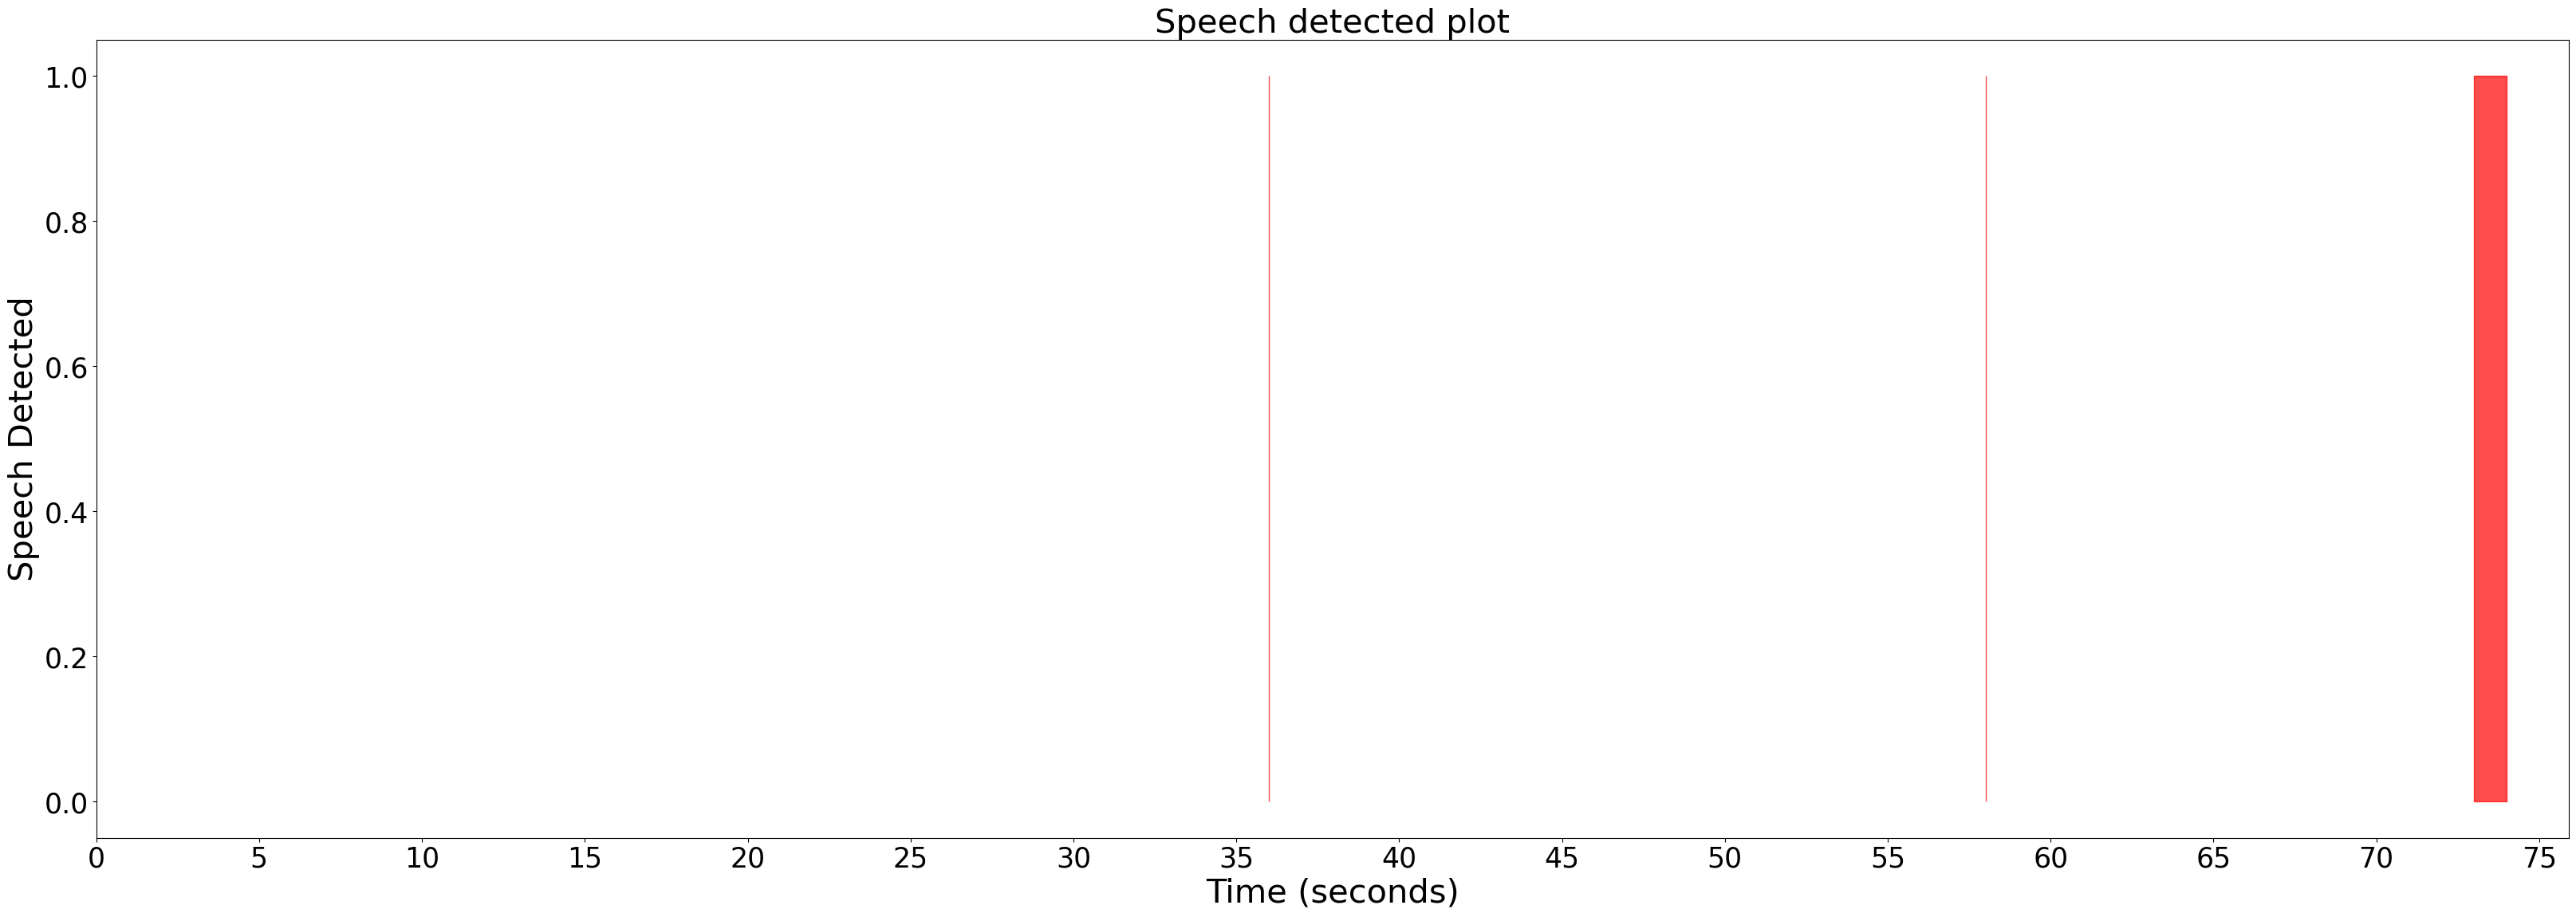

In [7]:
# Example usage:
process_and_plot("/Users/felixtong/Desktop/usf_msds/ACLU/data/bwc_and_dashcam_video/ACLU_2023.09.25_Records_Request/Axon_Body_3_Video_2023-05-07_1942_X60A79433.mp4")

# Identifying Dialogues in All MP4 Files within a Directory

In [1]:
def transcribe_audio(audio_segment):
    """Transcribe audio using Google Web Speech API."""
    r = sr.Recognizer()
    try:
        return r.recognize_google(audio_segment)
    except sr.UnknownValueError:
        return ""
    except sr.RequestError as e:
        raise Exception("Could not request results from GSR; {0}".format(e))

def process_video(video_path):
    """Process video to detect speech every second."""
    r = sr.Recognizer()
    audio = AudioFileClip(video_path)
    duration = int(audio.duration)
    binary_outcome = [0] * duration
    for i in range(duration):
        temp_filename = "temp.wav"
        audio.subclip(i, i+1).write_audiofile(temp_filename, logger=None)
        with sr.AudioFile(temp_filename) as source:
            audio_data = r.record(source)
            transcript = transcribe_audio(audio_data)
            if transcript:
                binary_outcome[i] = 1
        os.remove(temp_filename)  # remove temporary file
    return binary_outcome

def plot_binary_outcome(binary_outcome):
    """Plot binary outcome of speech detection."""
    plt.figure(figsize=(40, 6))
    x = np.arange(len(binary_outcome))
    plt.fill_between(x, binary_outcome, color='red', alpha=0.7,
                     where=np.array(binary_outcome)==1)
    plt.xticks(np.arange(min(x), max(x)+1, 5))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Speech Detected')
    plt.show()

def main(directory):
    """Main function to process all video files in a directory."""
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.mp4'):
                input_file_path = os.path.join(root, file)
                new_file_path = file.replace('.mp4','.mp3')
                output_file_path = os.path.join(root, new_file_path)
                if not os.path.isfile(output_file_path):
                    extract_audio(input_path=input_file_path,
                                  output_path=output_file_path)

                binary_outcome = process_video(output_file_path)
                plot_binary_outcome(binary_outcome)

if __name__ == "__main__":
    max_retries = 5
    retries = 0
    while retries < max_retries:
        try:
            main("/path/to/your/directory")  # replace with your directory
            break
        except ConnectionResetError:
            print("Connection reset by peer. Retrying...")
            time.sleep(5)
            retries += 1

In [ ]:
# Call the main function with your directory path
directory = "/path/to/your/directory"
main(directory)